Extraction

In [1]:
import tarfile

file = "cifar-100-python.tar.gz"
if file.endswith("tar.gz"):
    tar = tarfile.open(file, "r:gz")
    tar.extractall()
    tar.close()

/tmp/ipython-input-928945479.py:6: DeprecationWarning: Python 3.14 will, by default, filter extracted tar archives and reject files or modify their metadata. Use the filter argument to control this behavior.
  tar.extractall()


Loading

In [2]:
import pickle
import numpy as np

def load_cifar100_batch(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict


train_data = load_cifar100_batch("cifar-100-python/train")
test_data  = load_cifar100_batch("cifar-100-python/test")
meta_data  = load_cifar100_batch("cifar-100-python/meta")


X_train = train_data[b'data']
y_train = train_data[b'fine_labels']

X_test  = test_data[b'data']
y_test  = test_data[b'fine_labels']


X_train = X_train.reshape(-1, 3, 32, 32).transpose(0,2,3,1)  # (N, H, W, C)
X_test  = X_test.reshape(-1, 3, 32, 32).transpose(0,2,3,1)


Normalize

In [3]:
X_train = X_train.astype("float32") / 255.0
X_test  = X_test.astype("float32") / 255.0

from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, 100)
y_test  = to_categorical(y_test, 100)


In [4]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


CNN

In [5]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(32,32,3)),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    Dropout(0.25),

    Conv2D(64, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    Dropout(0.25),

    Conv2D(128, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    Dropout(0.25),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(100, activation='softmax')
])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [7]:
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
checkpoint = ModelCheckpoint("best_custom_cnn.h5", save_best_only=True, monitor='val_accuracy')


In [8]:
history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    epochs=50,
                    batch_size=64,
                    callbacks=[early_stop, checkpoint])


Epoch 1/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.0316 - loss: 4.5660

782/782 ━━━━━━━━━━━━━━━━━━━━ 21s 15ms/step - accuracy: 0.0316 - loss: 4.5658 - val_accuracy: 0.0942 - val_loss: 3.9471
Epoch 2/50
777/782 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0738 - loss: 4.0387

782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.0738 - loss: 4.0383 - val_accuracy: 0.1362 - val_loss: 3.7024
Epoch 3/50
781/782 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1044 - loss: 3.8258

782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.1044 - loss: 3.8257 - val_accuracy: 0.1930 - val_loss: 3.3588
Epoch 4/50
776/782 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1340 - loss: 3.6318

782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.1341 - loss: 3.6315 - val_accuracy: 0.2358 - val_loss: 3.1727
Epoch 5/50
773/782 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1634 - loss: 3.4549

782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.1634 - loss: 3.4546 - val_accuracy: 0.2612 - val_loss: 3.0030
Epoch 6/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1915 - loss: 3.3066

782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.1915 - loss: 3.3066 - val_accuracy: 0.2852 - val_loss: 2.8886
Epoch 7/50
776/782 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2111 - loss: 3.1829

782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.2111 - loss: 3.1827 - val_accuracy: 0.3082 - val_loss: 2.7482
Epoch 8/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.2413 - loss: 3.0550 - val_accuracy: 0.2955 - val_loss: 2.8106
Epoch 9/50
772/782 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2623 - loss: 2.9534

782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.2624 - loss: 2.9532 - val_accuracy: 0.3467 - val_loss: 2.6072
Epoch 10/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.2824 - loss: 2.8331 - val_accuracy: 0.3440 - val_loss: 2.6069
Epoch 11/50
775/782 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3039 - loss: 2.7306

782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.3039 - loss: 2.7305 - val_accuracy: 0.3620 - val_loss: 2.5138
Epoch 12/50
774/782 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3272 - loss: 2.6326

782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.3272 - loss: 2.6325 - val_accuracy: 0.3981 - val_loss: 2.3509
Epoch 13/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.3471 - loss: 2.5211 - val_accuracy: 0.3836 - val_loss: 2.4185
Epoch 14/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.3586 - loss: 2.4611 - val_accuracy: 0.3756 - val_loss: 2.5045
Epoch 15/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3782 - loss: 2.3746

782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.3782 - loss: 2.3746 - val_accuracy: 0.4271 - val_loss: 2.1902
Epoch 16/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3894 - loss: 2.3277

782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.3894 - loss: 2.3277 - val_accuracy: 0.4337 - val_loss: 2.1958
Epoch 17/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.3966 - loss: 2.2678 - val_accuracy: 0.4230 - val_loss: 2.2376
Epoch 18/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4134 - loss: 2.2157

782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.4134 - loss: 2.2157 - val_accuracy: 0.4537 - val_loss: 2.0920
Epoch 19/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.4183 - loss: 2.1694 - val_accuracy: 0.4452 - val_loss: 2.1305
Epoch 20/50
774/782 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4286 - loss: 2.1408

782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.4286 - loss: 2.1409 - val_accuracy: 0.4730 - val_loss: 2.0044
Epoch 21/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.4378 - loss: 2.0770 - val_accuracy: 0.4622 - val_loss: 2.0560
Epoch 22/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.4441 - loss: 2.0546 - val_accuracy: 0.3925 - val_loss: 2.4229
Epoch 23/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.4510 - loss: 2.0112 - val_accuracy: 0.4138 - val_loss: 2.3320
Epoch 24/50
773/782 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4592 - loss: 1.9825

782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.4592 - loss: 1.9829 - val_accuracy: 0.4827 - val_loss: 1.9746
Epoch 25/50
781/782 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4697 - loss: 1.9678

782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.4697 - loss: 1.9678 - val_accuracy: 0.4838 - val_loss: 1.9570
Epoch 26/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.4687 - loss: 1.9453 - val_accuracy: 0.4802 - val_loss: 1.9796
Epoch 27/50
780/782 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4739 - loss: 1.9357

782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.4739 - loss: 1.9357 - val_accuracy: 0.5011 - val_loss: 1.8858
Epoch 28/50
776/782 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4790 - loss: 1.8903

782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.4790 - loss: 1.8906 - val_accuracy: 0.5025 - val_loss: 1.8749
Epoch 29/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.4885 - loss: 1.8632 - val_accuracy: 0.4912 - val_loss: 1.9483
Epoch 30/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.4894 - loss: 1.8476 - val_accuracy: 0.4626 - val_loss: 2.0739
Epoch 31/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.4941 - loss: 1.8323 - val_accuracy: 0.4323 - val_loss: 2.2662
Epoch 32/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.4963 - loss: 1.8169 - val_accuracy: 0.4828 - val_loss: 1.9600
Epoch 33/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.4938 - loss: 1.8276 - val_accuracy: 0.4913 - val_loss: 1.9528


In [9]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f"Custom CNN Test Accuracy: {test_acc:.4f}")


313/313 - 1s - 4ms/step - accuracy: 0.5025 - loss: 1.8749
Custom CNN Test Accuracy: 0.5025


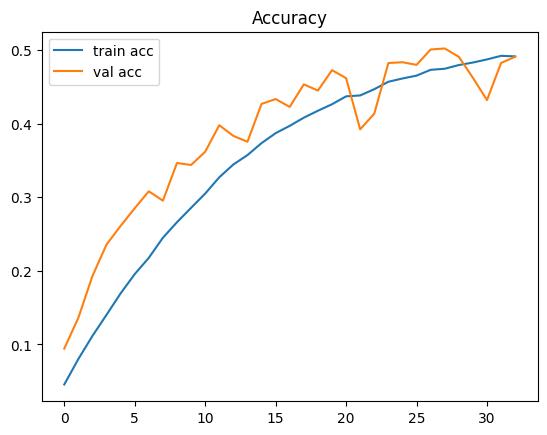

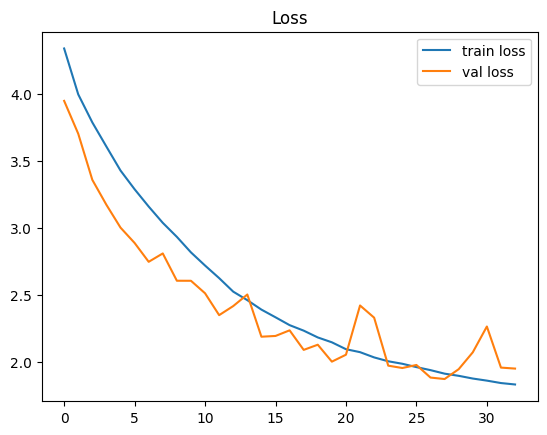

In [10]:
import matplotlib.pyplot as plt

# Accuracy
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.title("Accuracy")
plt.show()

# Loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.title("Loss")
plt.show()


In [11]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization, GlobalAveragePooling2D


Load

In [12]:

base_model = VGG16(weights='imagenet',
                   include_top=False,
                   input_shape=(32,32,3))


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [13]:
model_vgg = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(100, activation='softmax')
])


In [14]:
model_vgg.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])


In [15]:
history_vgg = model_vgg.fit(X_train, y_train,
                            validation_data=(X_test, y_test),
                            epochs=30,
                            batch_size=64,
                            callbacks=[early_stop, checkpoint])


Epoch 1/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 72s 77ms/step - accuracy: 0.0144 - loss: 4.5792 - val_accuracy: 0.0263 - val_loss: 4.3290
Epoch 2/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 62s 62ms/step - accuracy: 0.0272 - loss: 4.3137 - val_accuracy: 0.0341 - val_loss: 4.2622
Epoch 3/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 48s 62ms/step - accuracy: 0.0357 - loss: 4.1873 - val_accuracy: 0.0546 - val_loss: 4.0540
Epoch 4/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 83s 63ms/step - accuracy: 0.0451 - loss: 4.0861 - val_accuracy: 0.0646 - val_loss: 3.9649
Epoch 5/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 63ms/step - accuracy: 0.0566 - loss: 4.0036 - val_accuracy: 0.0681 - val_loss: 3.9522
Epoch 6/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 81s 62ms/step - accuracy: 0.0650 - loss: 3.9325 - val_accuracy: 0.0881 - val_loss: 3.7761
Epoch 7/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 63ms/step - accuracy: 0.0841 - loss: 3.7903 - val_accuracy: 0.0976 - val_loss: 3.6965
Epoch 8/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 81s 62ms/step - accuracy: 0.1016 - loss: 3.6405 - 

In [16]:
test_loss_vgg, test_acc_vgg = model_vgg.evaluate(X_test, y_test, verbose=2)
print(f"VGG16 Test Accuracy: {test_acc_vgg:.4f}")


313/313 - 4s - 13ms/step - accuracy: 0.2852 - loss: 2.9021
VGG16 Test Accuracy: 0.2852


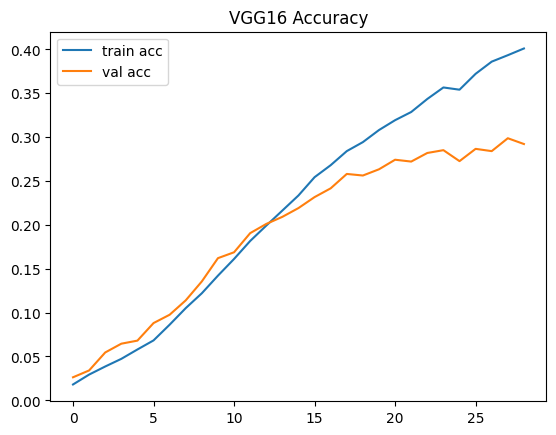

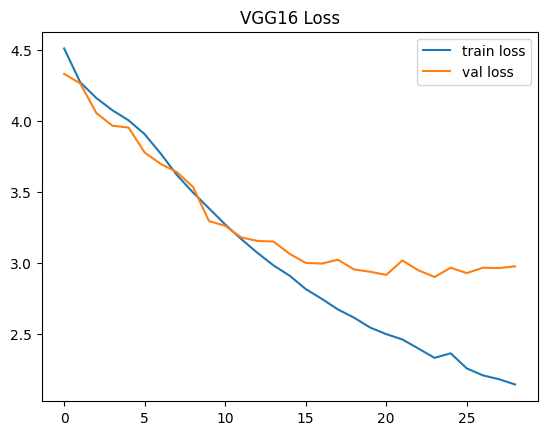

In [17]:
plt.plot(history_vgg.history['accuracy'], label='train acc')
plt.plot(history_vgg.history['val_accuracy'], label='val acc')
plt.legend()
plt.title("VGG16 Accuracy")
plt.show()

plt.plot(history_vgg.history['loss'], label='train loss')
plt.plot(history_vgg.history['val_loss'], label='val loss')
plt.legend()
plt.title("VGG16 Loss")
plt.show()


In [18]:
import pandas as pd

results = {
    "Model": ["Custom CNN", "VGG16"],
    "Test Accuracy": [test_acc, test_acc_vgg]
}

results_df = pd.DataFrame(results)
print(results_df)


        Model  Test Accuracy
0  Custom CNN         0.5025
1       VGG16         0.2852


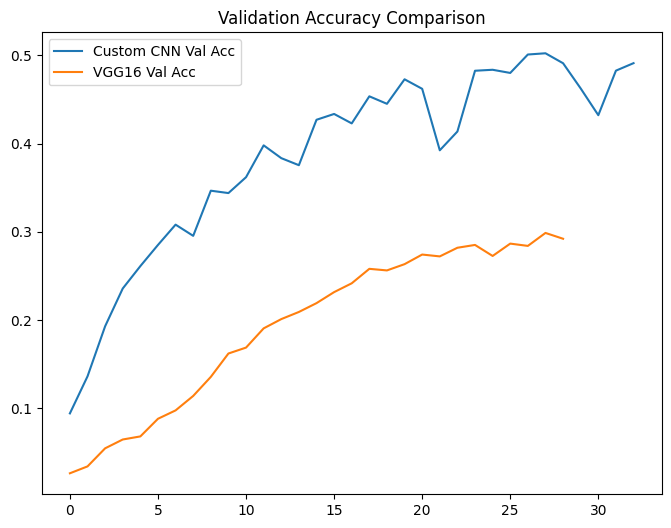

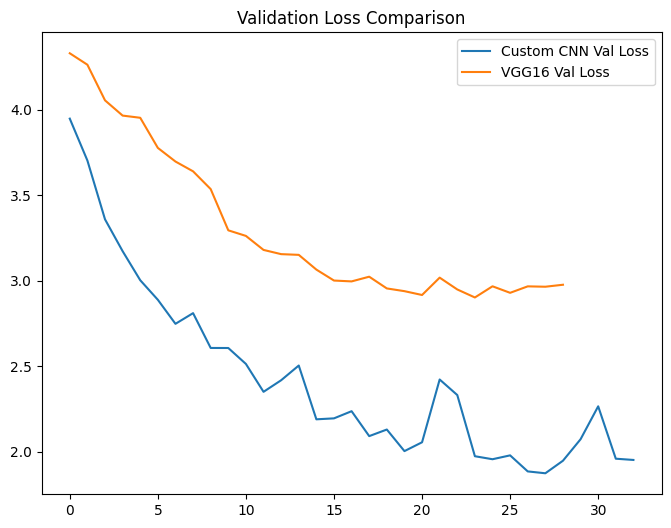

In [19]:

plt.figure(figsize=(8,6))
plt.plot(history.history['val_accuracy'], label='Custom CNN Val Acc')
plt.plot(history_vgg.history['val_accuracy'], label='VGG16 Val Acc')
plt.legend()
plt.title("Validation Accuracy Comparison")
plt.show()


plt.figure(figsize=(8,6))
plt.plot(history.history['val_loss'], label='Custom CNN Val Loss')
plt.plot(history_vgg.history['val_loss'], label='VGG16 Val Loss')
plt.legend()
plt.title("Validation Loss Comparison")
plt.show()


In [20]:
print("Custom CNN Summary:")
model.summary()

print("\nVGG16 Model Summary:")
model_vgg.summary()


Custom CNN Summary:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        25,700 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,932,270 (7.37 MB)

 Trainable params: 643,940 (2.46 MB)

 Non-trainable params: 448 (1.75 KB)

 Optimizer params: 1,287,882 (4.91 MB)


VGG16 Model Summary:


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 1, 1, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 100)            │        25,700 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 44,615,150 (170.19 MB)

 Trainable params: 14,871,716 (56.73 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 29,743,434 (113.46 MB)

Custom VGG16

In [21]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

num_classes = 100
input_shape = (32, 32, 3)

def build_vgg16_cifar(input_shape=(32,32,3), num_classes=100):
    model = Sequential(name="VGG16_custom")

    # Block 1: 64,64 + pool
    model.add(Conv2D(64, (3,3), activation='relu', padding='same',
                     kernel_initializer='he_normal', input_shape=input_shape))
    model.add(Conv2D(64, (3,3), activation='relu', padding='same',
                     kernel_initializer='he_normal'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    # Block 2: 128,128 + pool
    model.add(Conv2D(128, (3,3), activation='relu', padding='same',
                     kernel_initializer='he_normal'))
    model.add(Conv2D(128, (3,3), activation='relu', padding='same',
                     kernel_initializer='he_normal'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    # Block 3: 256,256,256 + pool
    model.add(Conv2D(256, (3,3), activation='relu', padding='same',
                     kernel_initializer='he_normal'))
    model.add(Conv2D(256, (3,3), activation='relu', padding='same',
                     kernel_initializer='he_normal'))
    model.add(Conv2D(256, (3,3), activation='relu', padding='same',
                     kernel_initializer='he_normal'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    # Block 4: 512,512,512 + pool
    model.add(Conv2D(512, (3,3), activation='relu', padding='same',
                     kernel_initializer='he_normal'))
    model.add(Conv2D(512, (3,3), activation='relu', padding='same',
                     kernel_initializer='he_normal'))
    model.add(Conv2D(512, (3,3), activation='relu', padding='same',
                     kernel_initializer='he_normal'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    # Block 5: 512,512,512 + pool
    model.add(Conv2D(512, (3,3), activation='relu', padding='same',
                     kernel_initializer='he_normal'))
    model.add(Conv2D(512, (3,3), activation='relu', padding='same',
                     kernel_initializer='he_normal'))
    model.add(Conv2D(512, (3,3), activation='relu', padding='same',
                     kernel_initializer='he_normal'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    # Classifier (VGG: Flatten -> 4096 -> 4096 -> num_classes)
    model.add(Flatten())
    model.add(Dense(4096, activation='relu', kernel_initializer='he_normal'))
    model.add(Dropout(0.5))
    model.add(Dense(4096, activation='relu', kernel_initializer='he_normal'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))

    return model

vgg16_custom = build_vgg16_cifar(input_shape, num_classes)
vgg16_custom.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
ckpt = ModelCheckpoint("best_vgg16_custom.h5", monitor='val_accuracy', save_best_only=True)

history_vgg_custom = vgg16_custom.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=50,
    batch_size=64,
    callbacks=[early_stop, ckpt],
    verbose=1
)

test_loss_vggc, test_acc_vggc = vgg16_custom.evaluate(X_test, y_test, verbose=0)
print(f"VGG16 (custom-built) Test Accuracy: {test_acc_vggc:.4f}")


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.0089 - loss: 4.6241

782/782 ━━━━━━━━━━━━━━━━━━━━ 68s 76ms/step - accuracy: 0.0089 - loss: 4.6241 - val_accuracy: 0.0100 - val_loss: 4.6052
Epoch 2/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 70s 67ms/step - accuracy: 0.0097 - loss: 4.6055 - val_accuracy: 0.0100 - val_loss: 4.6052
Epoch 3/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 81s 66ms/step - accuracy: 0.0092 - loss: 4.6055 - val_accuracy: 0.0100 - val_loss: 4.6052
Epoch 4/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 66ms/step - accuracy: 0.0098 - loss: 4.6055 - val_accuracy: 0.0100 - val_loss: 4.6052
Epoch 5/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 67ms/step - accuracy: 0.0091 - loss: 4.6055 - val_accuracy: 0.0100 - val_loss: 4.6052
Epoch 6/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 81s 66ms/step - accuracy: 0.0098 - loss: 4.6055 - val_accuracy: 0.0100 - val_loss: 4.6052
Epoch 7/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 83s 67ms/step - accuracy: 0.0086 - loss: 4.6055 - val_accuracy: 0.0100 - val_loss: 4.6052
Epoch 8/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 81s 66ms/step - accuracy: 0.0086 - loss: 4.6055 - val_accurac

In [22]:
test_loss_vggc, test_acc_vggc = vgg16_custom.evaluate(X_test, y_test, verbose=2)
print(f"Custom VGG16 Test Accuracy: {test_acc_vggc:.4f}")


313/313 - 2s - 8ms/step - accuracy: 0.0100 - loss: 4.6052
Custom VGG16 Test Accuracy: 0.0100


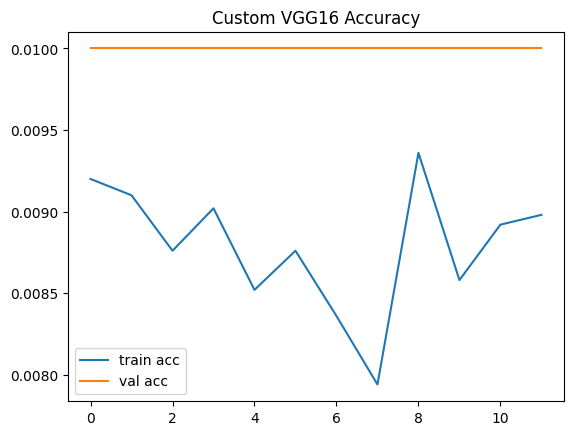

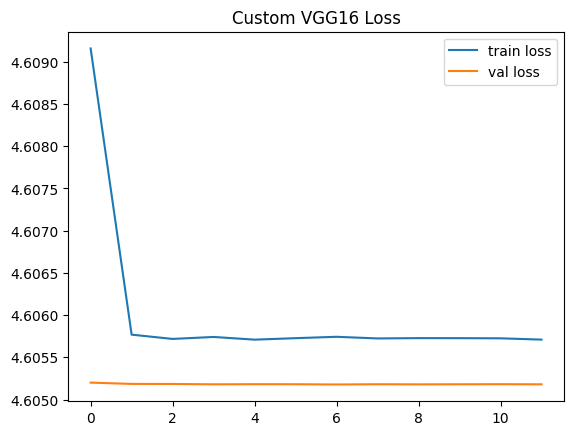

In [23]:
import matplotlib.pyplot as plt

# Accuracy plot
plt.plot(history_vgg_custom.history['accuracy'], label='train acc')
plt.plot(history_vgg_custom.history['val_accuracy'], label='val acc')
plt.title("Custom VGG16 Accuracy")
plt.legend()
plt.show()

# Loss plot
plt.plot(history_vgg_custom.history['loss'], label='train loss')
plt.plot(history_vgg_custom.history['val_loss'], label='val loss')
plt.title("Custom VGG16 Loss")
plt.legend()
plt.show()


In [24]:
import pandas as pd

results = {
    "Model": ["Custom CNN", "VGG16 (Pretrained)", "VGG16 (Custom Built)"],
    "Test Accuracy": [test_acc, test_acc_vgg, test_acc_vggc]
}

results_df = pd.DataFrame(results)
print(results_df)


                  Model  Test Accuracy
0            Custom CNN         0.5025
1    VGG16 (Pretrained)         0.2852
2  VGG16 (Custom Built)         0.0100


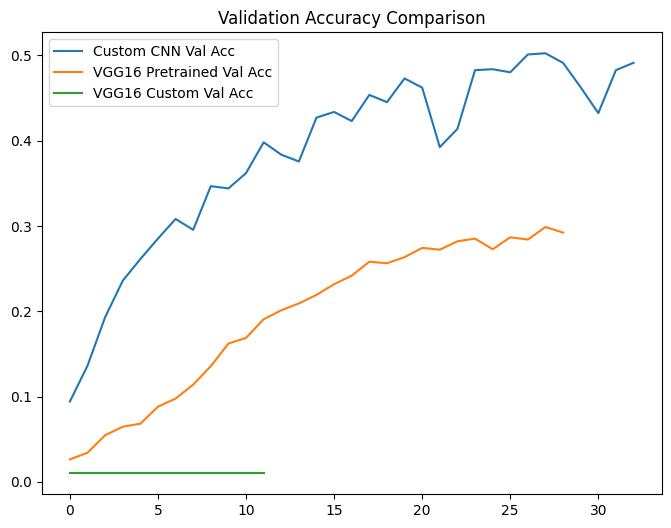

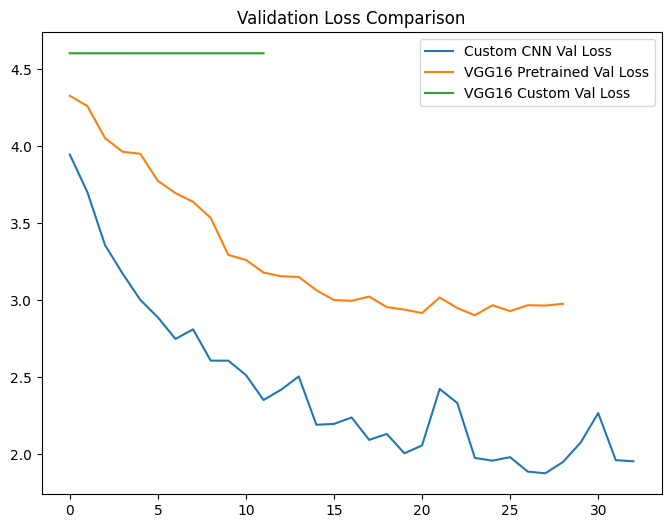

In [25]:
plt.figure(figsize=(8,6))
plt.plot(history.history['val_accuracy'], label='Custom CNN Val Acc')
plt.plot(history_vgg.history['val_accuracy'], label='VGG16 Pretrained Val Acc')
plt.plot(history_vgg_custom.history['val_accuracy'], label='VGG16 Custom Val Acc')
plt.legend()
plt.title("Validation Accuracy Comparison")
plt.show()

plt.figure(figsize=(8,6))
plt.plot(history.history['val_loss'], label='Custom CNN Val Loss')
plt.plot(history_vgg.history['val_loss'], label='VGG16 Pretrained Val Loss')
plt.plot(history_vgg_custom.history['val_loss'], label='VGG16 Custom Val Loss')
plt.legend()
plt.title("Validation Loss Comparison")
plt.show()
